## Titanic whit decision tree classifier ##
The purpose of this notebook is to predict the survivors or deceased, using decision tree classifier in python.

## Import of libraries ##

Import the libraries to use.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Data exploration ##

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data visualization ###
Visualization of the number of `survivors(1)` and `deceased(0)` based on their sex(`male`,`female`).

<AxesSubplot:xlabel='Survived', ylabel='count'>

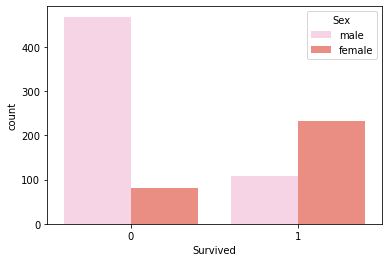

In [8]:
sns.countplot(x=df_train.Survived,hue=df_train.Sex,data=df_train,palette='Set3_r')

Visualization of the number of `survivors(1)` and `deceased(0)` based on their `Pclass(Ticket class)` = `1 = 1st`,` 2 = 2nd`, `3 = 3rd`.

<AxesSubplot:xlabel='Survived', ylabel='count'>

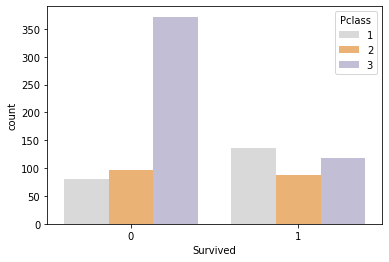

In [9]:
sns.countplot(x=df_train.Survived,hue=df_train.Pclass,data=df_train,palette='Set3_r')

## Cleaning missing data ##
Check the total number of miss data and use seaborn for visualization in one heatmap for data of training and test.

In [10]:
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Text(0.5, 1.0, 'Miss data in the training data')

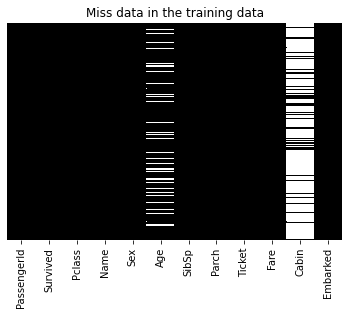

In [11]:
miss_data = df_train.isnull()
sns.heatmap(miss_data,yticklabels=False,cbar=False,cmap='gray')
plt.title('Miss data in the training data')

In [12]:
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

Text(0.5, 1.0, 'Miss data in the test data')

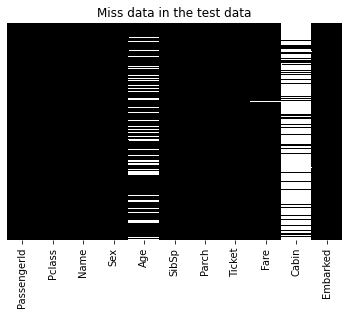

In [13]:
miss_data = df_test.isnull()
sns.heatmap(miss_data,yticklabels=False,cbar=False,cmap='gray')
plt.title('Miss data in the test data')

Used a heatmap to visualize the correlation of the features with the number of `survivors`. To take the most important features.

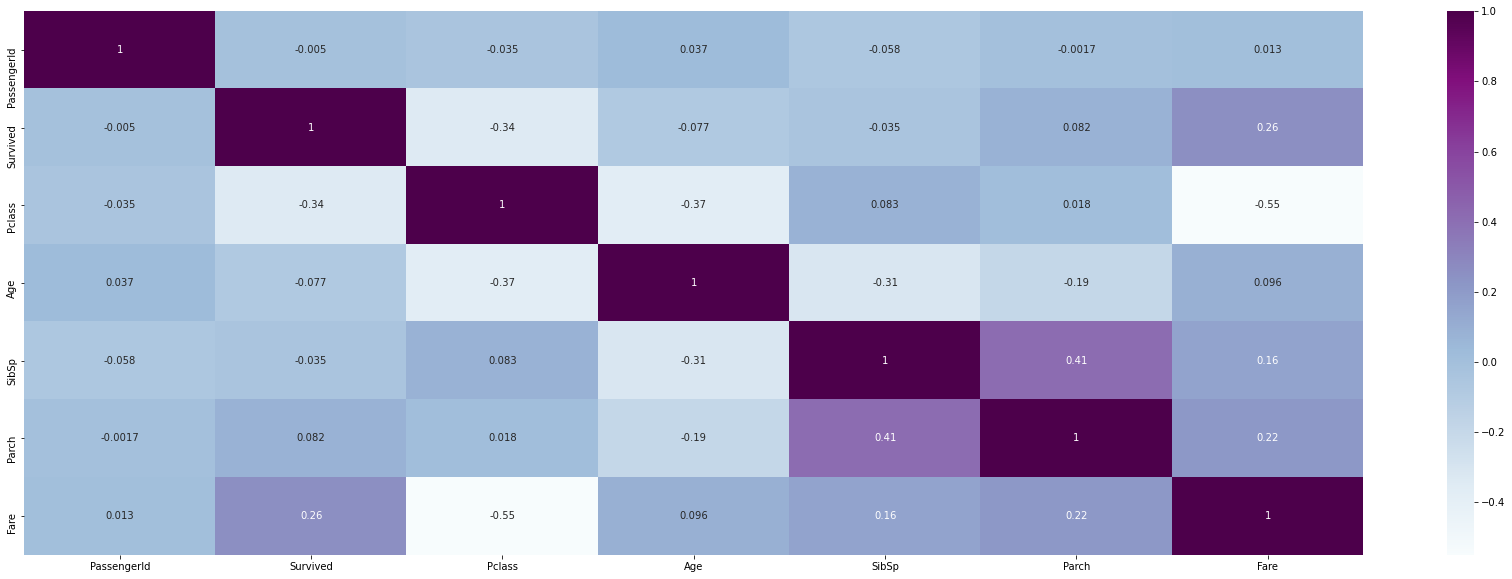

In [14]:
plt.figure(figsize=(30,10))
sns.heatmap(df_train.corr(),cmap='BuPu',annot=True)
plt.show()

In [15]:
corr = df_train.corr()
top_corr_features = corr.index[abs(corr['Survived'])>0.2]
top_corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

The most important features are `Survived`, `Pclass` and `Fare` 

In [16]:
df_train = df_train[['PassengerId','Survived', 'Pclass', 'Sex','Age']]
df_test = df_test[[ 'PassengerId','Pclass', 'Sex','Age']]

To deal with the missing Age data choose to use the mean to fill in the missing `Age` fields.

In [17]:
mean_age = round(df_train.Age.mean())
df_train['Age'] = df_train["Age"].replace(np.nan, mean_age)
df_test['Age'] = df_test["Age"].replace(np.nan, mean_age)

## Convert categorical data ##
The scikit-learn `LabelEncoder` library was used for categorical data preprocessing in the training and test data.

In [18]:
le = preprocessing.LabelEncoder()
df_train = df_train.apply(le.fit_transform)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age
0,0,0,2,1,28
1,1,1,0,0,51
2,2,1,2,0,34
3,3,1,0,0,47
4,4,0,2,1,47


In [19]:
le = preprocessing.LabelEncoder()
df_test = df_test.apply(le.fit_transform)
df_test.head()

,PassengerId,Pclass,Sex,Age
0,0,2,1,44
1,1,2,0,60
2,2,1,1,74
3,3,2,1,34
4,4,2,0,27


## Training model and predict ##
Used train_test_split to divide the data into a training set and a test set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['Survived','PassengerId'],axis=1), 
                                                    df_train['Survived'], test_size=0.1, 
                                                    random_state=101)

In [21]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

pred = decisiontree.predict(X_test)

### Evaluation ###
For the evaluation of employment `score` and `MSE` as evaluation metrics

In [22]:
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('Score train', decisiontree.score(X_train,y_train))
print('Score test', decisiontree.score(X_test,y_test))

MSE: 0.18888888888888888
Score train 0.8801498127340824
Score test 0.8111111111111111


## Results ##

In [23]:
df = pd.read_csv('test.csv')
Id = df['PassengerId']
predictions = decisiontree.predict(df_test.drop('PassengerId', axis=1))

result = pd.DataFrame({ 'PassengerId' : Id, 'Survived': predictions })
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [24]:
result.to_csv('submission.csv' , index=False)